In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from quantumnetworks import SingleModeSystem, plot_full_evolution, animate_evolution, DoubleModeSystem, MultiModeSystem, plot_evolution_phase_space,plot_full_evolution_phase_space
import numpy as np
import matplotlib.pyplot as plt

# Pulse Drive

In [31]:
# N modes

gaussian_drive_gen = lambda amp, a, w, t0, t: amp*np.exp(1j*w*t) * np.exp(-a*(t-t0)**2) # gaussian envelope + carrier frequency centered at time t0

wd = 1
a = 5
t0 = 2
amp = 1000

N = 100
wr = 1
g = 2
omegas = [2*np.pi*wr]*N
kappas = [0]*N
kappas[0] = 2*np.pi*0.005 
gammas = 2*np.pi*0.05*np.ones(N)
kerrs = 2*np.pi*.000*np.ones(N)
couplings = []
for i in range(N-1):
    couplings.append([i,i+1,2*np.pi*g])

drives = {0:lambda t: gaussian_drive_gen(amp, a, 2*np.pi*(wd), t0, t)}

sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "drives":drives, "couplings":couplings})

x_0 = np.array([0,0]*N)
ts = np.linspace(0, 20, 1001)
X = sys.trapezoidal(x_0, ts)

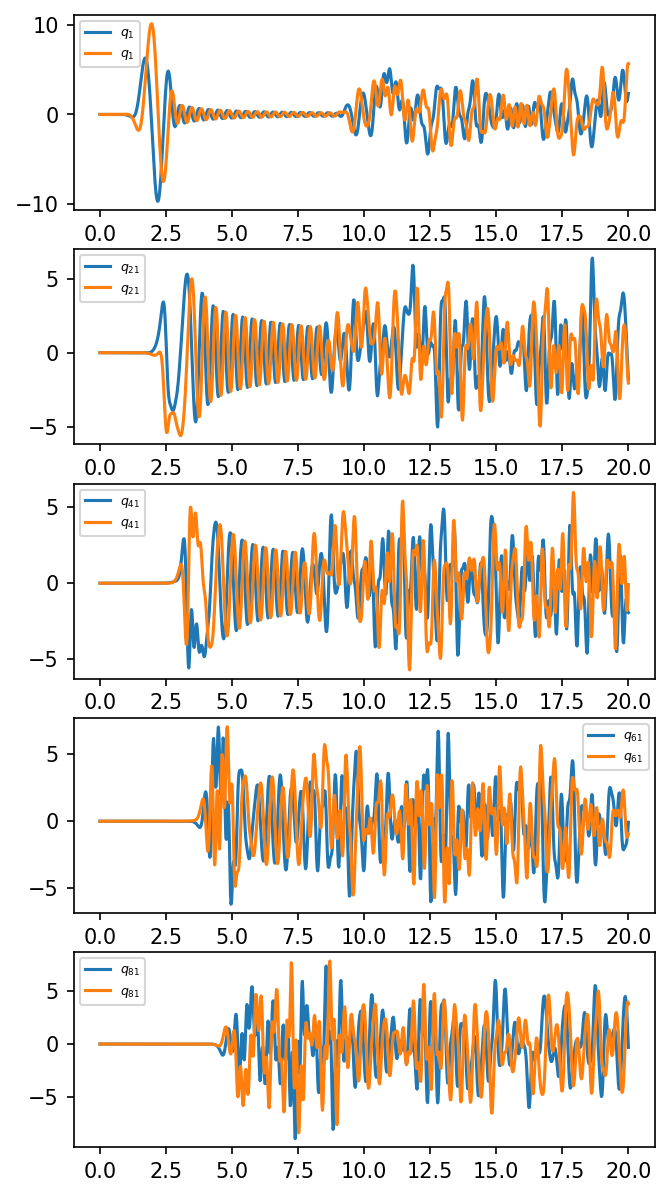

In [12]:
num_plots = 5
fig, axs = plt.subplots(num_plots,1, figsize=(5,2*num_plots), dpi=150)

ylim = np.array([-100,100])

for j in range(0,num_plots):
    i = j*N//num_plots
    ax = axs[j]
    labels = ["$q_{" + str(i+1) + "}$","$p_{" + str(i+1) + "}$"]
    # plot_full_evolution(X[2*i:2*(i+1)], ts, fig=fig, ax=ax, labels=labels)
    ax.plot(ts, X[2*i,:], label=labels[0])
    ax.plot(ts, X[2*i+1,:], label=labels[0])
    # ax.plot(ts, X[2*i:2*(i+1),:], fig=fig, ax=ax, labels=labels)
    ax.legend(fontsize=6)
    # ax.set_title(None)
    ax.set_xlabel(None)
#     ax.set_ylim(*ylim)

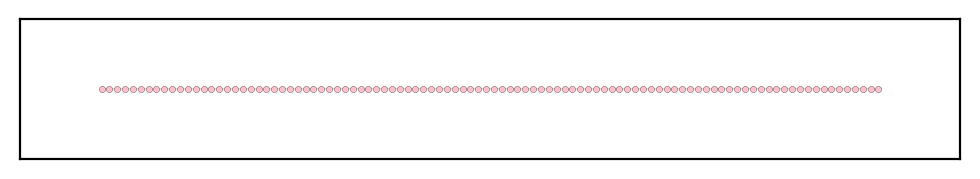

In [5]:
fig, ax = plt.subplots(1, figsize=(5, 1), dpi=200)
pos = {}
for i in range(N):
    pos[i]=[2*i,1]
_ = sys.draw_network(ax=ax, pos=pos, with_edge_labels=False, with_node_labels=False, node_size=5, width=.1, linewidths=.1)

In [32]:
fig, ax = plt.subplots(1, figsize=(6, .5), dpi=200)
sys.animate_networkx(X, ts, ax=ax, pos=pos, animation_time=5, num_frames=54, with_edge_labels=False, with_node_labels=False, save_animation="train_loss_50MHz.gif", node_size=5, width=.1, linewidths=.1)

(<Figure size 1200x100 with 1 Axes>,
 <AxesSubplot:title={'center':'t = 19.64 ns'}>)